<a href="https://colab.research.google.com/github/BhaktiGajipara/LLM/blob/main/transfer_learning_feature_extraction(data_augmentation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:13<00:00, 125MB/s]
100% 1.06G/1.06G [00:13<00:00, 86.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow
from tensorflow import keras
from keras.src.utils import image_dataset
from keras import Sequential
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(weights = "imagenet",
                  include_top = False,
                  input_shape = (150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [7]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dense(1,activation ="sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
conv_base.trainable = False

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [14]:
history = model.fit_generator(
    train_generator,
    epochs = 10,
    validation_data = validation_generator,
)

<ipython-input-14-6ea4fec2a70a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
625/625 [==============================] - 162s 246ms/step - loss: 0.3072 - accuracy: 0.8667 - val_loss: 0.2379 - val_accuracy: 0.9018
Epoch 2/10
625/625 [==============================] - 149s 239ms/step - loss: 0.2403 - accuracy: 0.8969 - val_loss: 0.2030 - val_accuracy: 0.9162
Epoch 3/10
625/625 [==============================] - 153s 246ms/step - loss: 0.2175 - accuracy: 0.9085 - val_loss: 0.2123 - val_accuracy: 0.9090
Epoch 4/10
625/625 [==============================] - 150s 240ms/step - loss: 0.2111 - accuracy: 0.9092 - val_loss: 0.2001 - val_accuracy: 0.9138
Epoch 5/10
625/625 [==============================] - 150s 240ms/step - loss: 0.1991 - accuracy: 0.9153 - val_loss: 0.1972 - val_accuracy: 0.9164
Epoch 6/10
625/625 [==============================] - 151s 242ms/step - loss: 0.1875 - accuracy: 0.9205 - val_loss: 0.1856 - val_accuracy: 0.9242
Epoch 7/10
625/625 [==============================] - 150s 240ms/step - loss: 0.1774 - accuracy: 0.9244 - val_loss: 0.1901 -

In [15]:
model.save("transfer_learning_feature_extraction(data_augmentation).keras")

In [16]:
import matplotlib.pyplot as plt

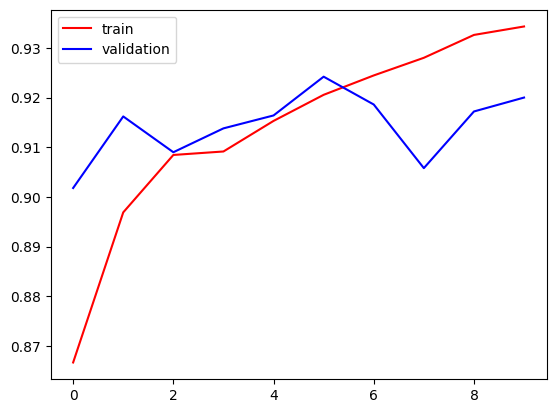

In [17]:
plt.plot(history.history['accuracy'],color = "red" ,label = "train")
plt.plot(history.history['val_accuracy'],color = "blue", label = "validation")
plt.legend()
plt.show()

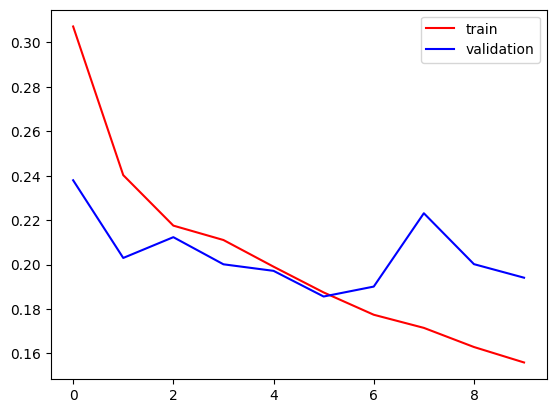

In [18]:
plt.plot(history.history['loss'],color = "red" ,label = "train")
plt.plot(history.history['val_loss'],color = "blue", label = "validation")
plt.legend()
plt.show()